In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.shape

(891, 12)

## EDA

In [7]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# checking null values
df.isnull().sum()

# we can see there are alot of null values in Cabin Age 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(891, 12)

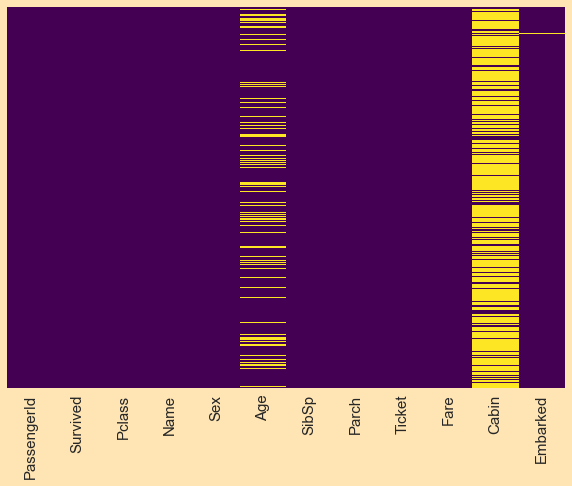

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.shape
# visualizing the null values

# We can see almost 20% data in age are having null values and more than 80% of data in Cabin is having null values

In [12]:
# with respect to cabin feature there are alot of null values, we can drop it 
df.drop(['Cabin'],axis=1,inplace=True)

In [13]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
568,569,0,3,"Doharr, Mr. Tannous",male,NaN,0,0,2686,7.2292,C


In [14]:
# checking the data where missing values are present in Age feature
df[df['Age'].isnull()]  # here the data is missing completely at random

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


<AxesSubplot:xlabel='Age', ylabel='Count'>

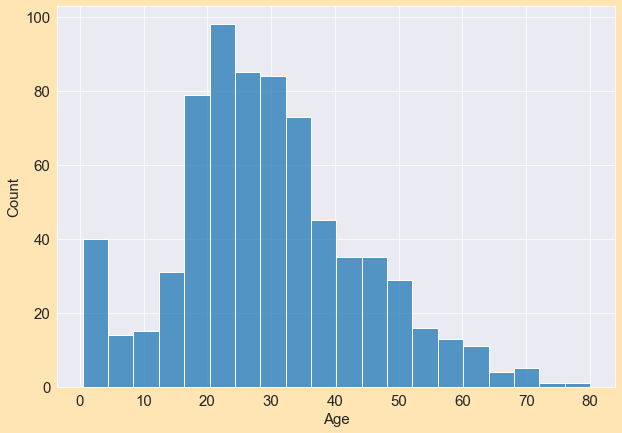

In [15]:
# checking the distribution of Age
sns.histplot(df['Age']) 


 df['Age'].fillna(df['Age'].median(),inplace=True)

In [16]:
df['Age'].isnull().sum()

177

In [17]:
df['Age'].dropna().sample() # it gives one random sample or value

239    33.0
Name: Age, dtype: float64

In [18]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)  # it gives random sample values for all the missing values based on the nonnull values in Age itself

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [19]:
# writing a function to try imputing using median and random imputation methods
def impute_nan(df,feature,median):
    df[feature+'median'] = df[feature].fillna(median)
    df[feature+'random'] = df[feature]
    
    random_sample = df[feature].dropna().sample(df['Age'].isnull().sum(),random_state=0)
    # below here if want to merge the data the indexes have to be same so we are giving 
    random_sample.index = df[df[feature].isnull()].index
    
    df.loc[df[feature].isnull(),feature+'random'] = random_sample
    

In [20]:
median = df['Age'].median()
median

28.0

In [21]:
impute_nan(df,'Age',median)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Agemedian,Agerandom
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0,35.0


<AxesSubplot:ylabel='Density'>

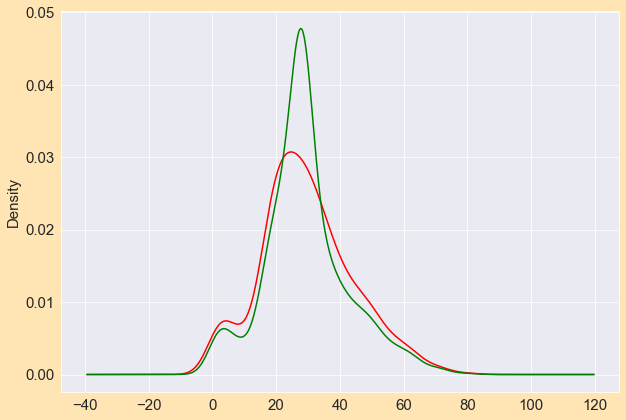

In [23]:
# Cjecking the distribution to make sure it is fitting properly
fig = plt.figure()
ax = fig.add_subplot(111)

df['Age'].plot(kind='kde',ax=ax,color='red')
df['Agemedian'].plot(kind='kde',ax=ax,color='green')

# we can see after applying mean imputation and comapring the both graphs,the distribution is getting distorted it may cause problems


<AxesSubplot:ylabel='Density'>

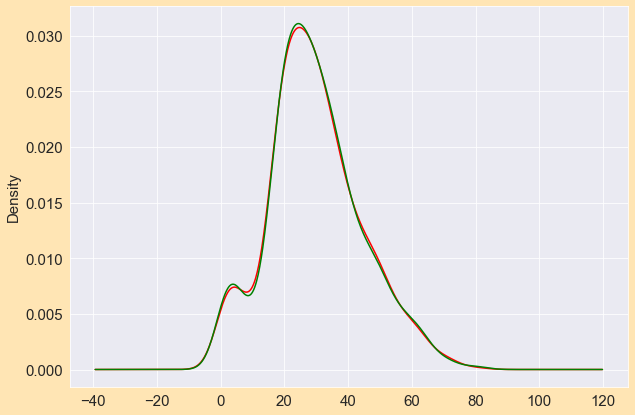

In [24]:
# Again checking the distribution if it fits for random imputation
fig = plt.figure()
ax = fig.add_subplot(111)

df['Age'].plot(kind='kde',ax=ax,color='red')
df['Agerandom'].plot(kind='kde',ax=ax,color='green')

# We can see the two distributions are overlapping without any change in the distribution, we can say random imputation will be right choice


In [25]:
# dropping the original Age and Age median feature because they are not necessary as we already filled the null values
df.drop(['Agemedian','Age'],axis=1,inplace=True)

In [26]:
df[df['Embarked'].isnull()] # We can see embarked data is  missing completely at random

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Agerandom
61,62,1,1,"Icard, Miss. Amelie",female,0,0,113572,80.0,NaN,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,0,0,113572,80.0,NaN,62.0


In [27]:
mode = df['Embarked'].mode()
mode

0    S
dtype: object

In [28]:
mode[0] # S is place which is the mode of Embarked 

'S'

In [29]:
# filling the na values in embarked with its mode
df['Embarked'].fillna(mode[0],inplace=True)

In [30]:
# CHECKING THE NULL VALUES NOW
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Agerandom      0
dtype: int64

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Agerandom
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.0


In [32]:
duplicates = df[df.duplicated()]

In [33]:
duplicates # No duplicates

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Agerandom


In [34]:
# Dropping features which are not useful for our model learning
df.drop(['PassengerId','Name','Ticket',],axis=1,inplace=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

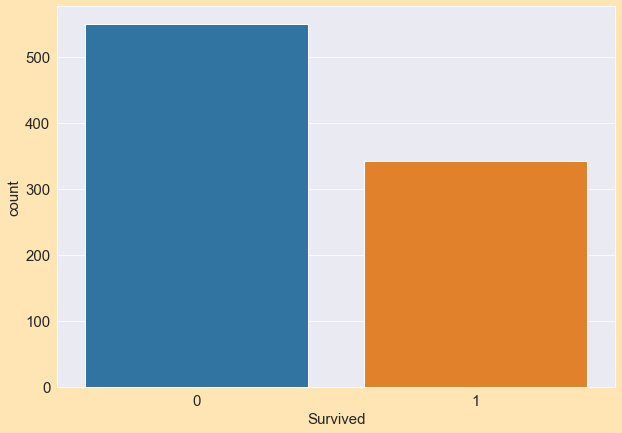

In [35]:
# checking the target values
sns.countplot('Survived',data=df)

In [36]:
df.Survived.value_counts() # we can see there might be an imbalance in the data

0    549
1    342
Name: Survived, dtype: int64

In [37]:
df.Survived.value_counts(normalize=True)*100 # % of target data

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [38]:
# Balancing the data
# checking the versions first
import sklearn
sklearn.__version__


'1.1.2'

In [39]:
import numpy 
numpy.__version__

# We can go ahead and balance the feature now


'1.20.3'

### EDA

In [40]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Agerandom
0,0,3,male,1,0,7.2500,S,22.0
1,1,1,female,1,0,71.2833,C,38.0
2,1,3,female,0,0,7.9250,S,26.0
3,1,1,female,1,0,53.1000,S,35.0
4,0,3,male,0,0,8.0500,S,35.0


In [41]:
df.describe().transpose()

# We can see Fare is highly skewed and contains may contain many outliers because the 75th percentile and max value has huge difference
# Agerandom is also skewed and may conatin outliers aswell.

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Agerandom,891.0,29.700348,14.563654,0.42,21.0000,28.0000,38.0,80.0000


In [42]:
df.Survived.value_counts() # The data is imbalanced 

0    549
1    342
Name: Survived, dtype: int64

In [43]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Agerandom'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

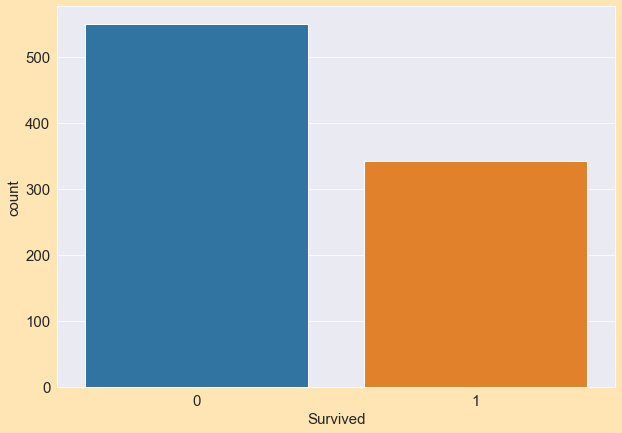

In [44]:
sns.countplot('Survived',data=df)
# 0- most of the people did not survive
# 1 - some of the people survived

<AxesSubplot:xlabel='Sex', ylabel='count'>

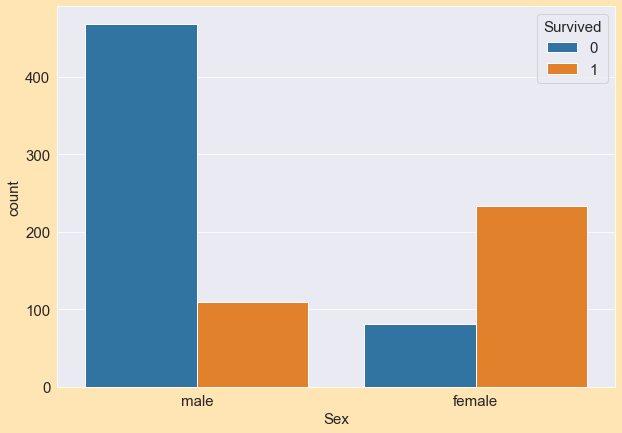

In [45]:
# checking the number of survived and  not survived men and women 
sns.countplot(x='Sex',hue='Survived',data=df)

# We can see most of the people who are not survived are men and very less women died
# And women had survived more than men and very few men lived.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

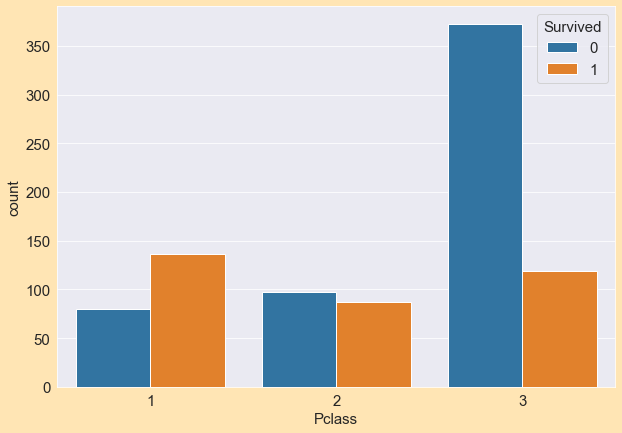

In [46]:
# looking at the passenger classes 
sns.countplot('Pclass',hue='Survived',data=df)

# class 1 represent upper class
# 2 is middle level class
# 3 is low level class

<AxesSubplot:xlabel='Survived', ylabel='count'>

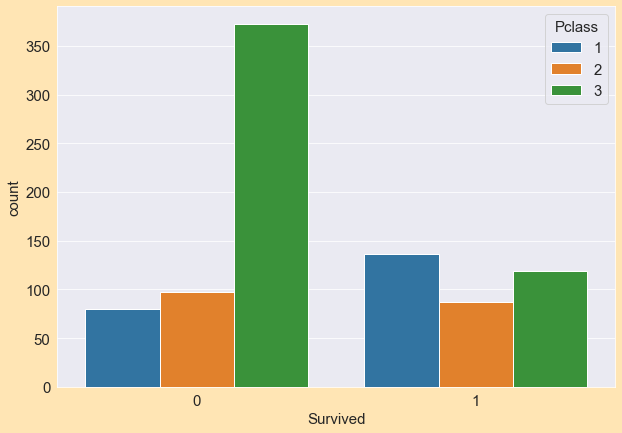

In [47]:
# Analysing the survival data  according to the passeger classes
sns.countplot(x='Survived',hue='Pclass',data=df)

# We can most of the class 3 passengers has not survived, which makes sense because because class 3 passengers are given less safety facilities
# and also a very few class 1 and 2 passengers have died.

# Clearly class 1 passengers have survived the most and very few class 3 passengers have lived.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

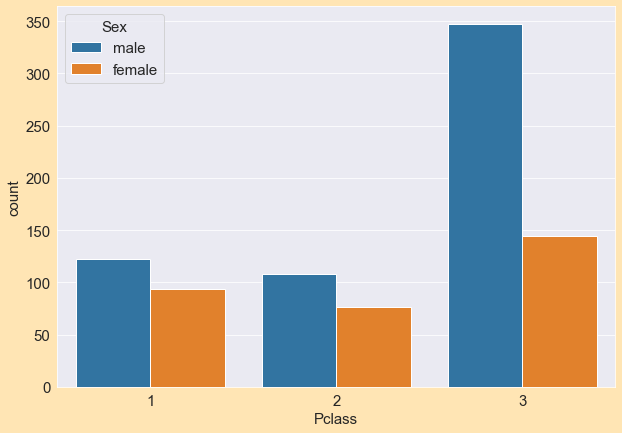

In [48]:
sns.countplot(x='Pclass',hue='Sex',data=df)
# if we want to see how many men and women belongs to each passesnger class
# most of the men belongs to class 3, which makes sense because they can be workers on the ship


<AxesSubplot:xlabel='SibSp', ylabel='count'>

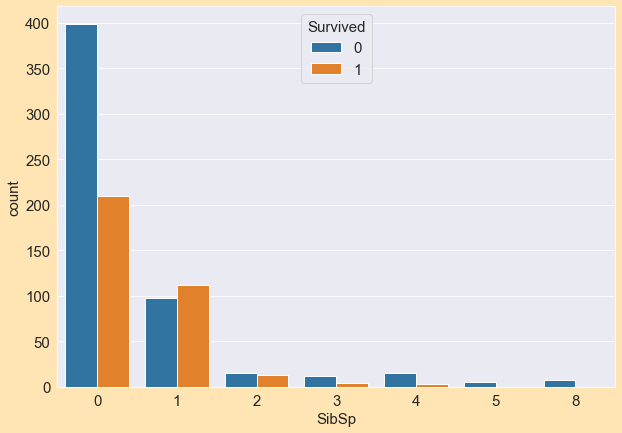

In [49]:
sns.countplot(x ='SibSp',hue='Survived',data=df)
# we can see most passengers who didnot come with no spouse or siblings didnot survive 

<AxesSubplot:xlabel='Parch', ylabel='count'>

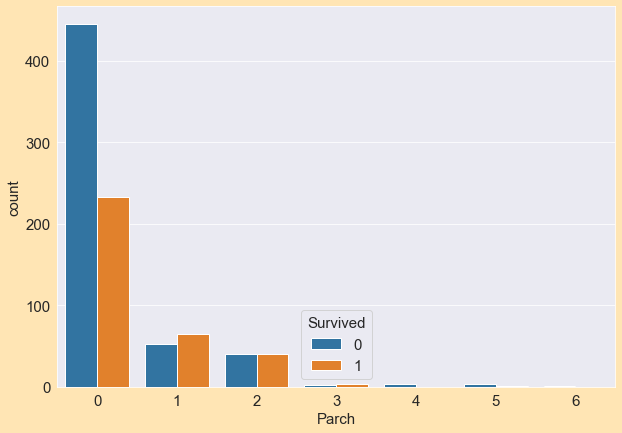

In [50]:
sns.countplot(x='Parch',hue='Survived',data=df)

# same goes with the Parch, most passengers who didn't come with a parent or child didn't survive

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

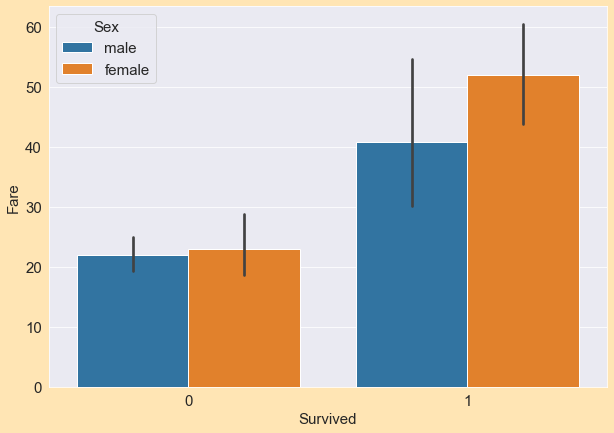

In [51]:
# Continuous and categorical
sns.barplot(x='Survived',y='Fare',hue='Sex',data=df)
# Passengers who paid more have survived, it makes sense
# And most high fare is paid by women

<AxesSubplot:xlabel='Survived', ylabel='Agerandom'>

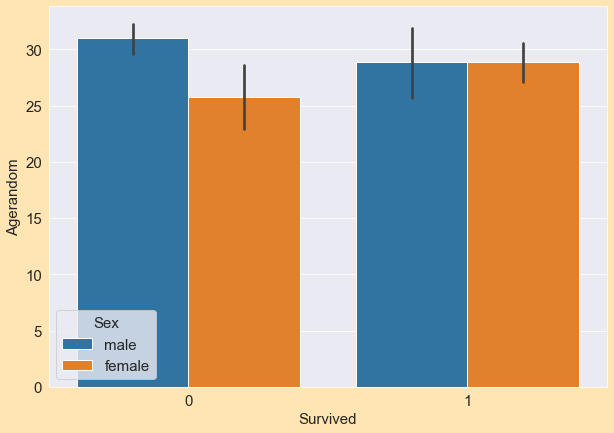

In [52]:
sns.barplot(x='Survived',y='Agerandom',hue='Sex',data=df)

In [53]:
# checking survival rate of male and female 
df.groupby('Sex')['Survived'].mean()*100

# 74% of female survived this catastrophe 
# while men's survival rate is only 18%

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [54]:
# looking at the survival rate by sex and pclass
df.pivot_table('Survived',index='Sex',columns='Pclass')*100

# We can see in the lowest class 3 50% of survival rate while men have only 13%
# And if you are a female or woman travelling in pclass 1 there is 96% chance of survival

Pclass,1,2,3
Sex,,,
female,96.808511,92.105263,50.000000
male,36.885246,15.740741,13.544669


<AxesSubplot:xlabel='Sex'>

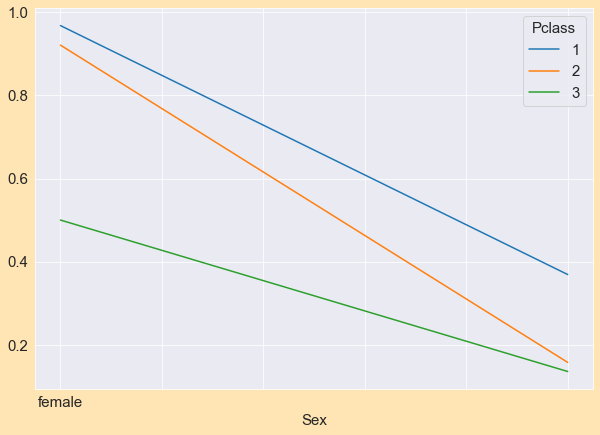

In [55]:
#plotting the above
df.pivot_table('Survived',index='Sex',columns='Pclass').plot()
# We can clearly observe the same thing in the graphs

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

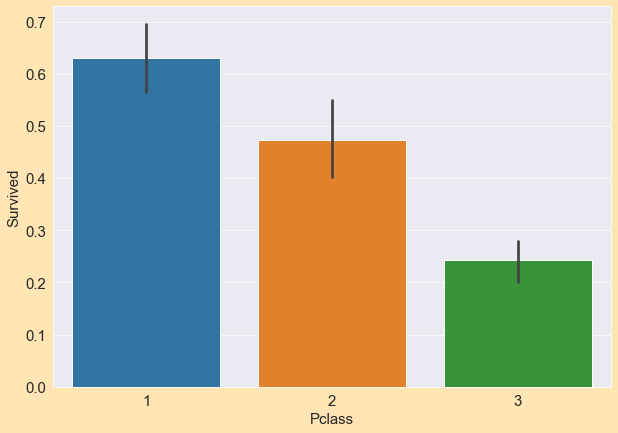

In [56]:
# Survival rate of each class
sns.barplot(x='Pclass',y='Survived',data=df)
# class 1 survival rate is more follwing class 2 and 3

In [57]:
df['Agerandom'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 50.  , 31.  ,  0.92, 34.  ,
       15.  ,  8.  , 36.  , 19.  , 40.  , 65.  , 66.  , 42.  , 21.  ,
       18.  , 47.  ,  3.  ,  7.  , 49.  , 29.  , 28.5 ,  5.  , 11.  ,
       45.  , 33.  , 17.  , 32.  , 16.  , 25.  ,  0.75, 24.  ,  0.83,
       30.  , 23.  , 46.  , 59.  , 71.  , 37.  , 14.5 , 70.5 , 32.5 ,
       12.  ,  9.  , 36.5 , 51.  , 55.5 , 40.5 , 44.  ,  1.  , 52.  ,
       61.  , 56.  , 45.5 , 20.5 , 62.  , 41.  , 63.  , 57.  , 13.  ,
       23.5 , 43.  , 60.  ,  0.42, 10.  , 64.  , 48.  , 53.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 , 34.5 , 74.  ])

In [58]:
df['Agerandom'].max() # A 80 year old has travelled in the ship

80.0

In [59]:
# Survival rate by age,sex and class
age = pd.cut(df['Agerandom'],[0.0,30.0,80.0])
df.pivot_table('Survived',['Sex',age],'Pclass')

# we can see the age between 30-80 has very high survival rate for women in class 1
# And there is not even 50% chance of survival for a male, even if he is in class 1 and is aged between 0 to 80

Pclass                      1         2         3
Sex    Agerandom                                 
female (0.0, 30.0]   0.952381  0.931818  0.518868
       (30.0, 80.0]  0.980769  0.906250  0.447368
male   (0.0, 30.0]   0.416667  0.196429  0.137778
       (30.0, 80.0]  0.348837  0.115385  0.131148

<AxesSubplot:xlabel='Embarked', ylabel='count'>

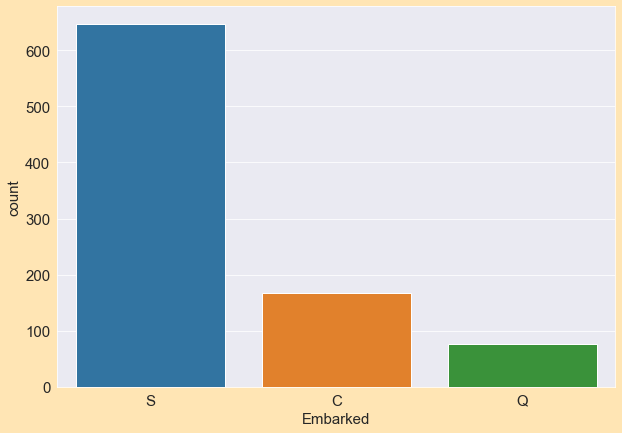

In [60]:
sns.countplot('Embarked',data=df)
# most of the passengers boarded from Southampton

In [61]:
df.groupby('Embarked')['Survived'].mean()*100
# People who have boarded from Cherbourg has high survival rate

Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64

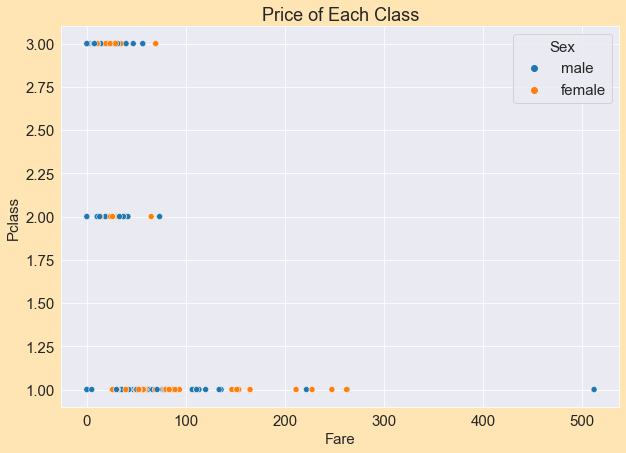

In [62]:
# prices paid by each class
sns.scatterplot(x='Fare',y='Pclass',hue='Sex',data=df)

plt.title('Price of Each Class')
plt.show()

# We can see for class 1 a man had to pay more than 500 dollars


In [63]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Agerandom
0,0,3,male,1,0,7.2500,S,22.0
1,1,1,female,1,0,71.2833,C,38.0
2,1,3,female,0,0,7.9250,S,26.0
3,1,1,female,1,0,53.1000,S,35.0
4,0,3,male,0,0,8.0500,S,35.0


In [64]:
df.shape

(891, 8)

In [65]:
# correlation 
df.corr().transpose()

,Survived,Pclass,SibSp,Parch,Fare,Agerandom
Survived,1.000000,-0.338481,-0.035322,0.081629,0.257307,-0.044463
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.549500,-0.310630
SibSp,-0.035322,0.083081,1.000000,0.414838,0.159651,-0.208169
Parch,0.081629,0.018443,0.414838,1.000000,0.216225,-0.167231
Fare,0.257307,-0.549500,0.159651,0.216225,1.000000,0.096466
Agerandom,-0.044463,-0.310630,-0.208169,-0.167231,0.096466,1.000000


In [66]:
df.dtypes

Survived       int64
Pclass         int64
Sex           object
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
Agerandom    float64
dtype: object

In [67]:
# checking the unique values of categorical column
print(df.Sex.unique())
print(df.Embarked.unique())

['male' 'female']
['S' 'C' 'Q']


In [68]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Agerandom'],
      dtype='object')

In [69]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Agerandom
0,0,3,male,1,0,7.2500,S,22.0
1,1,1,female,1,0,71.2833,C,38.0
2,1,3,female,0,0,7.9250,S,26.0
3,1,1,female,1,0,53.1000,S,35.0
4,0,3,male,0,0,8.0500,S,35.0


In [70]:
# Encoding the categorical features using onehot encoding and dropping the first column if binary
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='if_binary')

df_object = df.select_dtypes('object')
ohe.fit(df_object)

codes = ohe.transform(df_object).toarray()
feature_names = ohe.get_feature_names(['Sex','Embarked'])

df = pd.concat([df.select_dtypes(exclude='object'),
pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)


In [71]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Agerandom,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,22.0,1,0,0,1
1,1,1,1,0,71.2833,38.0,0,1,0,0
2,1,3,0,0,7.9250,26.0,0,0,0,1
3,1,1,1,0,53.1000,35.0,0,0,0,1
4,0,3,0,0,8.0500,35.0,1,0,0,1


In [72]:
df.dtypes

Survived        int64
Pclass          int64
SibSp           int64
Parch           int64
Fare          float64
Agerandom     float64
Sex_male        int32
Embarked_C      int32
Embarked_Q      int32
Embarked_S      int32
dtype: object

In [73]:
# checking the correlation
df.corr().transpose()

,Survived,Pclass,SibSp,Parch,Fare,Agerandom,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.035322,0.081629,0.257307,-0.044463,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.549500,-0.310630,0.131900,-0.243292,0.221009,0.074053
SibSp,-0.035322,0.083081,1.000000,0.414838,0.159651,-0.208169,-0.114631,-0.059528,-0.026354,0.068734
Parch,0.081629,0.018443,0.414838,1.000000,0.216225,-0.167231,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.257307,-0.549500,0.159651,0.216225,1.000000,0.096466,-0.182333,0.269335,-0.117216,-0.162184
Agerandom,-0.044463,-0.310630,-0.208169,-0.167231,0.096466,1.000000,0.083042,0.031971,0.002468,-0.029561
Sex_male,-0.543351,0.131900,-0.114631,-0.245489,-0.182333,0.083042,1.000000,-0.082853,-0.074115,0.119224
Embarked_C,0.168240,-0.243292,-0.059528,-0.011069,0.269335,0.031971,-0.082853,1.000000,-0.148258,-0.782742
Embarked_Q,0.003650,0.221009,-0.026354,-0.081228,-0.117216,0.002468,-0.074115,-0.148258,1.000000,-0.499421
Embarked_S,-0.149683,0.074053,0.068734,0.060814,-0.162184,-0.029561,0.119224,-0.782742,-0.499421,1.000000


<AxesSubplot:>

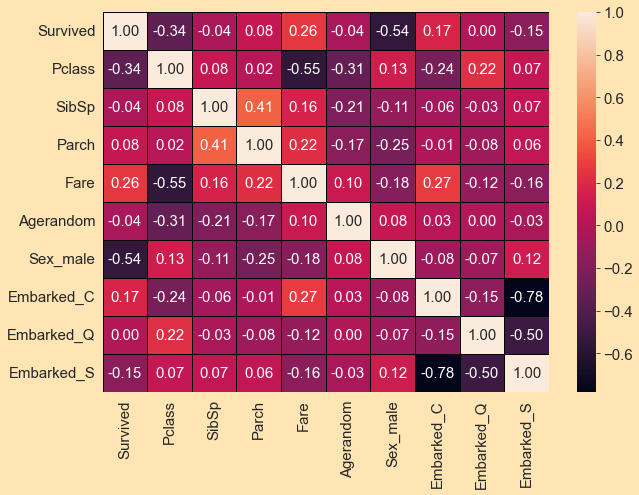

In [74]:
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

In [75]:
df.corr()['Survived'].sort_values()
# we can see embarked_s is least correlated with Embark so we should drop it.

Sex_male     -0.543351
Pclass       -0.338481
Embarked_S   -0.149683
Agerandom    -0.044463
SibSp        -0.035322
Embarked_Q    0.003650
Parch         0.081629
Embarked_C    0.168240
Fare          0.257307
Survived      1.000000
Name: Survived, dtype: float64

In [76]:
df.drop(['Embarked_Q'],axis=1,inplace=True)

In [77]:
df.head()

,Survived,Pclass,SibSp,Parch,Fare,Agerandom,Sex_male,Embarked_C,Embarked_S
0,0,3,1,0,7.2500,22.0,1,0,1
1,1,1,1,0,71.2833,38.0,0,1,0
2,1,3,0,0,7.9250,26.0,0,0,1
3,1,1,1,0,53.1000,35.0,0,0,1
4,0,3,0,0,8.0500,35.0,1,0,1


Survived          AxesSubplot(0.125,0.71587;0.227941x0.16413)
Pclass         AxesSubplot(0.398529,0.71587;0.227941x0.16413)
SibSp          AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Parch            AxesSubplot(0.125,0.518913;0.227941x0.16413)
Fare          AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Agerandom     AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Sex_male         AxesSubplot(0.125,0.321957;0.227941x0.16413)
Embarked_C    AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Embarked_S    AxesSubplot(0.672059,0.321957;0.227941x0.16413)
dtype: object

<Figure size 1800x720 with 0 Axes>

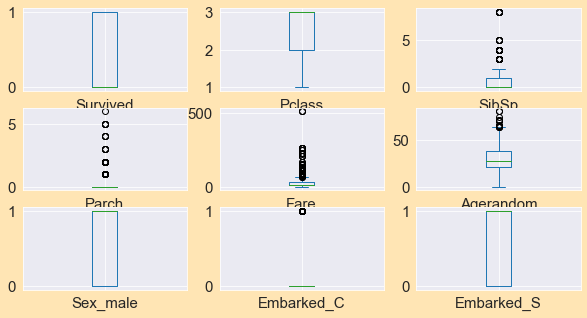

In [78]:
# checking the outliers
plt.figure(figsize=(25,10))
df.plot(kind ='box',subplots = True, layout =(4,3),sharex = False)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

<Figure size 1800x720 with 0 Axes>

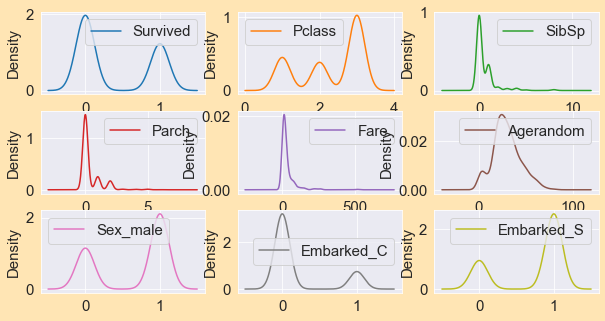

In [79]:
# checking the skewness
plt.figure(figsize=(25,10))
df.plot(kind ='density',subplots = True, layout =(4,3),sharex = False)

<AxesSubplot:xlabel='Fare'>

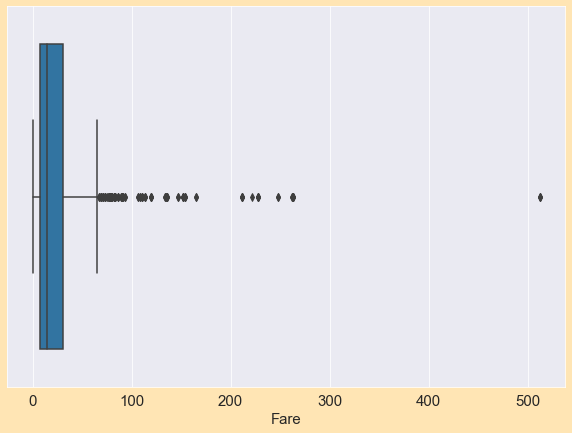

In [80]:
sns.boxplot('Fare',data=df)

<AxesSubplot:xlabel='Agerandom'>

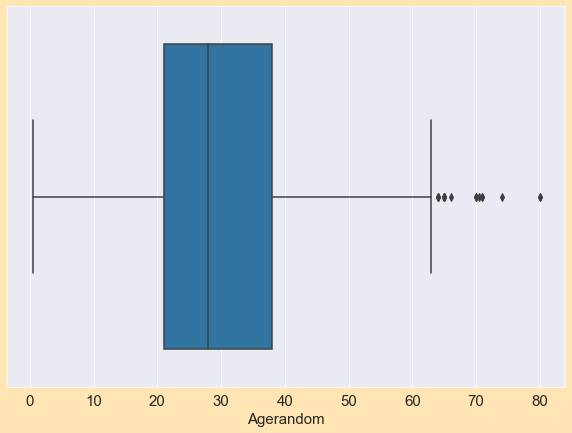

In [81]:
sns.boxplot('Agerandom',data=df)

In [82]:
# removing outliers
from scipy.stats import zscore

dfContCols = df[["Fare","Agerandom"]]

z=np.abs(zscore(dfContCols))

print(np.where(z>3))


(array([ 27,  88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 630,
       679, 689, 700, 716, 730, 737, 742, 779, 839, 851], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1], dtype=int64))


In [83]:
df_new=df[(z<3).all(axis=1)]

In [84]:
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df_new.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df_new.shape[0])/df.shape[0]*100)

shape before and after
shape before         : (891, 9)
shape after          : (868, 9)
Percentage Loss      : 2.581369248035915


In [85]:
# finding out the quantile of data with continuous columns
Q1 = dfContCols.quantile(0.25)
Q3 = dfContCols.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD (be carefull with the variables used here)
df_new_quant = df[~((dfContCols < (Q1 - 1.5 * IQR)) |(dfContCols > (Q3 + 1.5 * IQR))).any(axis=1)]

In [86]:
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df_new_quant.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df_new_quant.shape[0])/df.shape[0]*100)

# We can see that the dataloss is more using quantile method 

shape before and after
shape before         : (891, 9)
shape after          : (761, 9)
Percentage Loss      : 14.590347923681257


In [87]:
# So, we are taking the zscore columns
df_new.shape

(868, 9)

<AxesSubplot:xlabel='Fare'>

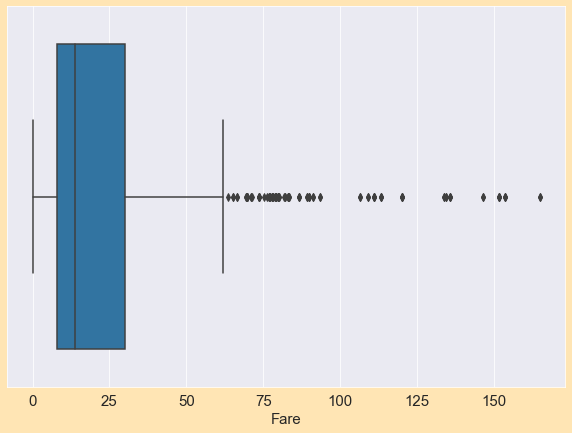

In [88]:
# Now checking the outliers again
sns.boxplot('Fare',data=df_new)
# we can see far outliers are removed

<AxesSubplot:xlabel='Agerandom'>

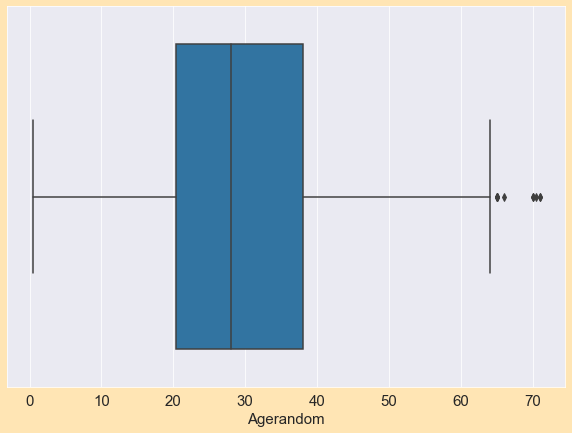

In [89]:
sns.boxplot('Agerandom',data=df_new)
# few ouliers removed

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

<Figure size 1800x720 with 0 Axes>

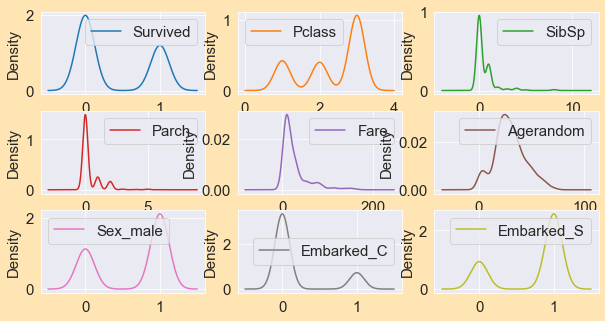

In [90]:
# checking the skewness again
plt.figure(figsize=(25,10))
df_new.plot(kind ='density',subplots = True, layout =(4,3),sharex = False)

In [91]:
df_new.skew().sort_values()

Embarked_S   -1.053563
Pclass       -0.702066
Sex_male     -0.639652
Agerandom     0.309484
Survived      0.514751
Embarked_C    1.681416
Fare          2.247684
Parch         2.842956
SibSp         3.757957
dtype: float64

In [ ]:
#
df.Survived.value_counts()

In [92]:
# splitting the data
x = df_new.iloc[:,1:]
y = df_new.iloc[:,0]

In [93]:
from imblearn.over_sampling import SMOTE 
smt = SMOTE()
x,y = smt.fit_resample(x,y)

<AxesSubplot:xlabel='Survived', ylabel='count'>

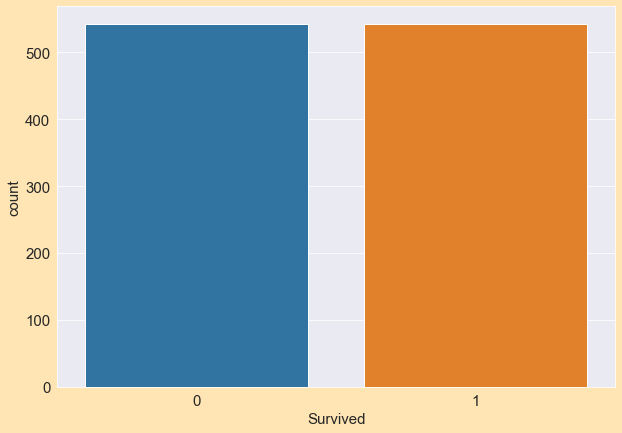

In [102]:
sns.countplot(y) 

In [94]:
x.shape

(1084, 8)

In [95]:
# scaling the data
from sklearn.preprocessing import StandardScaler

In [96]:
sc = StandardScaler()
x[['Agerandom','Fare']] = sc.fit_transform(x[['Agerandom','Fare']])

In [97]:
x.head()

,Pclass,SibSp,Parch,Fare,Agerandom,Sex_male,Embarked_C,Embarked_S
0,3,1,0,-0.687877,-0.513492,1,0,1
1,1,1,0,1.382387,0.599634,0,1,0
2,3,0,0,-0.666054,-0.235211,0,0,1
3,1,1,0,0.794502,0.390923,0,0,1
4,3,0,0,-0.662012,0.390923,1,0,1


In [103]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Logistic Regression

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [106]:
lr = LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('At random state:-',i)
        print('Training accuracy score is ', round(accuracy_score(y_train,pred_train)*100,1))
        print('Testing accuracy score is ', round(accuracy_score(y_test,pred_test)*100,1), '\n\n')

At random state 23 The model performs very well
At random state:- 23
Training accuracy score is  82.2
Testing accuracy score is  82.2 


At random state 86 The model performs very well
At random state:- 86
Training accuracy score is  82.2
Testing accuracy score is  82.2 


At random state 92 The model performs very well
At random state:- 92
Training accuracy score is  81.9
Testing accuracy score is  81.9 


At random state 145 The model performs very well
At random state:- 145
Training accuracy score is  81.9
Testing accuracy score is  81.9 


At random state 146 The model performs very well
At random state:- 146
Training accuracy score is  81.9
Testing accuracy score is  81.9 


At random state 226 The model performs very well
At random state:- 226
Training accuracy score is  81.9
Testing accuracy score is  81.9 


At random state 240 The model performs very well
At random state:- 240
Training accuracy score is  82.2
Testing accuracy score is  82.2 


At random state 254 The model per

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=0)

In [119]:
lr.fit(x_train,y_train)

LogisticRegression()

In [120]:
pred_train = lr.predict(x_train)

In [121]:
pred_test = lr.predict(x_test)

In [122]:
accuracy_score(y_train,pred_train)

0.8218997361477572

In [123]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       159
           1       0.80      0.84      0.82       167

    accuracy                           0.81       326
   macro avg       0.81      0.81      0.81       326
weighted avg       0.81      0.81      0.81       326



In [124]:
confusion_matrix(y_test,pred_test)

array([[124,  35],
       [ 26, 141]], dtype=int64)

In [125]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)

In [126]:
# FINDING THE BEST CV FOR LOGISTIC REG
for j in range(4,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    print(lsscore)
    lsc = lsscore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',lsc*100)
    print('accuracy_score is:- ',lss*100)
    print('\n')
    
    # We can see our cross validation score is same as accuracy_score, cv = 8 is selected

[0.79335793 0.73062731 0.84870849 0.88560886]
At cv:-  4
Cross validation score is:-  81.45756457564576
accuracy_score is:-  81.28834355828221


[0.77880184 0.78801843 0.74654378 0.88940092 0.87037037]
At cv:-  5
Cross validation score is:-  81.46270694657792
accuracy_score is:-  81.28834355828221


[0.7679558  0.80110497 0.72928177 0.81767956 0.88888889 0.87777778]
At cv:-  6
Cross validation score is:-  81.378146101903
accuracy_score is:-  81.28834355828221


[0.76774194 0.82580645 0.71612903 0.71612903 0.89032258 0.91612903
 0.87012987]
At cv:-  7
Cross validation score is:-  81.46268478065713
accuracy_score is:-  81.28834355828221


[0.77941176 0.80882353 0.75735294 0.71323529 0.80740741 0.88888889
 0.88888889 0.88148148]
At cv:-  8
Cross validation score is:-  81.56862745098039
accuracy_score is:-  81.28834355828221


[0.7768595  0.80165289 0.76859504 0.71900826 0.73333333 0.85
 0.89166667 0.88333333 0.88333333]
At cv:-  9
Cross validation score is:-  81.19758187940006
accuracy_sc

In [175]:
# selecting the cv=8
lsscore_selected = cross_val_score(lr,x,y,cv=8).mean()
print('The cv score of logistcic Regression is ',lsscore_selected,'\nThe accuracy score of logistic regression is: ',lss)

The cv score of logistcic Regression is  0.8156862745098039 
The accuracy score of logistic regression is:  0.8128834355828221


In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [155]:
dtc = DecisionTreeClassifier()
svc = SVC()
knc = KNeighborsClassifier()
gnb =  GaussianNB()
sgd = SGDClassifier()
rfc = RandomForestClassifier()

## DecisionTree

In [129]:
dtc= DecisionTreeClassifier()
# huperparameter tuning DTC
cvs = GridSearchCV(dtc,{'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"]})

In [130]:
cvs.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})

In [131]:
print(cvs.best_score_)
print(cvs.best_estimator_)
print(cvs.best_params_)

0.8179156500522831
DecisionTreeClassifier(criterion='entropy')
{'criterion': 'entropy', 'splitter': 'best'}


In [180]:
# running the model using best parameters
dtc = DecisionTreeClassifier(criterion='entropy',splitter='best') # using the best parameters
dtc.fit(x_train,y_train)
pred_dtc_test= dtc.predict(x_test)
pred_dtc_train = dtc.predict(x_train)
print('Training score of dtc',accuracy_score(pred_dtc_train,y_train))
print('Accuracy Score of dtc',accuracy_score(pred_dtc_test,y_test))
print('Confusion Matrix of dtc',confusion_matrix(pred_test,y_test))
print('Classification report of Dtc',classification_report(pred_test,y_test))
print('\n')

Training score of dtc 0.9894459102902374
Accuracy Score of dtc 0.8251533742331288
Confusion Matrix of dtc [[124  26]
 [ 35 141]]
Classification report of Dtc               precision    recall  f1-score   support

           0       0.78      0.83      0.80       150
           1       0.84      0.80      0.82       176

    accuracy                           0.81       326
   macro avg       0.81      0.81      0.81       326
weighted avg       0.81      0.81      0.81       326





In [181]:
dtca = accuracy_score(pred_dtc_test,y_test)
dtca

0.8251533742331288

In [182]:
# Checking the cross validation
for j in range(4,10):
    dtcscore = cross_val_score(dtc,x,y,cv=j)
    print(dtcscore)
    dsc = dtcscore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',dsc*100)
    print('accuracy_score is:- ',dtca*100)
    print('\n')
    
    # cv=8 is selected

[0.78597786 0.77859779 0.86715867 0.88929889]
At cv:-  4
Cross validation score is:-  83.02583025830259
accuracy_score is:-  82.51533742331289


[0.73271889 0.76958525 0.76958525 0.87096774 0.88425926]
At cv:-  5
Cross validation score is:-  80.54232804232804
accuracy_score is:-  82.51533742331289


[0.71823204 0.75138122 0.74585635 0.85082873 0.87222222 0.9       ]
At cv:-  6
Cross validation score is:-  80.64200941272765
accuracy_score is:-  82.51533742331289


[0.70967742 0.8        0.72258065 0.77419355 0.88387097 0.85806452
 0.9025974 ]
At cv:-  7
Cross validation score is:-  80.72834999102281
accuracy_score is:-  82.51533742331289


[0.72058824 0.80882353 0.79411765 0.73529412 0.83703704 0.9037037
 0.85185185 0.92592593]
At cv:-  8
Cross validation score is:-  82.21677559912854
accuracy_score is:-  82.51533742331289


[0.69421488 0.81818182 0.80165289 0.80165289 0.78333333 0.84166667
 0.875      0.89166667 0.925     ]
At cv:-  9
Cross validation score is:-  82.58187940006123
accu

In [188]:
# cv=4 for DecisionTree
dtcscore_selected = cross_val_score(dtc,x,y,cv=4).mean()
print('The cv score of DecisionTree is ',dtcscore_selected,'\nThe accuracy score of DecisionTree is: ',dtca)

The cv score of DecisionTree is  0.8293357933579335 
The accuracy score of DecisionTree is:  0.8251533742331288


In [218]:
# framing the parameters
# no of trees in random forest
n_estimators = [int(x) for x in range(10,110,10)]

# method of measuring the quality of split 
criterion = ['gini','entropy','log_loss']

# features to consider for best split
max_features = ["sqrt", "log2", None]

# max depth of the tree
max_depth = [2,4]

min_samples_split = [2,5]

min_samples_leaf = [1,2]

bootstrap = [True,False]

In [219]:
# creating the paramgrid
param_grid = {'n_estimators':n_estimators,
             'criterion':criterion,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_features': ['sqrt', 'log2', None], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [167]:
# Random forest with hyperparameter tuning
rfcs = GridSearchCV(rfc,param_grid=param_grid)

In [168]:
rfcs.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]})

In [169]:
print(rfcs.best_score_)
print(rfcs.best_estimator_)
print(rfcs.best_params_) # we got the best score and best params

0.8417044266294876
RandomForestClassifier(criterion='log_loss', max_depth=4, max_features=None,
                       n_estimators=30)
{'bootstrap': True, 'criterion': 'log_loss', 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


In [172]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=True,criterion='log_loss',max_depth=4,max_features=None,min_samples_leaf=1, min_samples_split=2, n_estimators=30)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print('Accuracy',accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 85.88957055214725
[[138  21]
 [ 25 142]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       159
           1       0.87      0.85      0.86       167

    accuracy                           0.86       326
   macro avg       0.86      0.86      0.86       326
weighted avg       0.86      0.86      0.86       326



In [173]:
# cross validationfor RFC
from sklearn.model_selection import cross_val_score
rfa = accuracy_score(y_test,predrf)

In [189]:
for j in range(4,10):
    rfscore = cross_val_score(rf,x,y,cv=j)
    print(rfscore)
    rfc = rfscore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',rfc*100)
    print('accuracy_score is:- ',rfa*100)
    print('\n')
# We can see the accuracy is almost same
# cv=5 is selected

[0.80811808 0.75276753 0.88191882 0.91512915]
At cv:-  4
Cross validation score is:-  83.94833948339485
accuracy_score is:-  85.88957055214725


[0.79262673 0.81105991 0.77880184 0.91705069 0.89814815]
At cv:-  5
Cross validation score is:-  83.95374637310121
accuracy_score is:-  85.88957055214725


[0.78453039 0.82320442 0.74585635 0.86187845 0.9        0.93333333]
At cv:-  6
Cross validation score is:-  84.14671577655004
accuracy_score is:-  85.88957055214725


[0.79354839 0.83225806 0.7483871  0.76774194 0.91612903 0.89677419
 0.91558442]
At cv:-  7
Cross validation score is:-  83.8631875037405
accuracy_score is:-  85.88957055214725


[0.80882353 0.80882353 0.79411765 0.71323529 0.85925926 0.91111111
 0.88148148 0.92592593]
At cv:-  8
Cross validation score is:-  83.78472222222221
accuracy_score is:-  85.88957055214725


[0.80991736 0.80165289 0.81818182 0.74380165 0.79166667 0.89166667
 0.91666667 0.925      0.91666667]
At cv:-  9
Cross validation score is:-  84.61355984083258
accu

In [193]:
# cv=9 is selected for random forest
rfscore_selected = cross_val_score(rf,x,y,cv=6).mean()
print('The cv score of DecisionTree is ',rfscore_selected,'\nThe accuracy score of DecisionTree is: ',rfa)

The cv score of DecisionTree is  0.8377736852874976 
The accuracy score of DecisionTree is:  0.8588957055214724


In [138]:
def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_1_pred_train = algorithm_instance.predict(x_train)
    model_1_pred_test = algorithm_instance.predict(x_test)
    print('Accuracy Score of the training model: ',accuracy_score(y_train,model_1_pred_train))
    print('Accuracy Score of the testing model: ',accuracy_score(y_test,model_1_pred_test))
    print('Classification report of the test data \n ',classification_report(y_test,model_1_pred_test))
    print('Classification report of the train data \n ',classification_report(y_train,model_1_pred_train))
    print('Confusion Matrix: \n',confusion_matrix(y_test,model_1_pred_test))

In [194]:
# Hperparameter tuning for SUPPORT VECTOR CLASSIFEIR

In [240]:
# creating paramgrid
param_grid = {'C':[0.1,1,100,1000],
                 'kernel':['rbf','poly','sigmoid','linear'],
                 'degree':[1,2,3,4,5,6],'gamma':['scale','auto']}
print(paramgrid_svc)

{'C': [0.1, 1, 100, 1000], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], 'degree': ([1, 2, 3, 4, 5, 6],)}


In [241]:
svcs = GridSearchCV(svc,param_grid,error_score='raise')

In [242]:
svcs.fit(x_train,y_train)

GridSearchCV(error_score='raise', estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [243]:
print(svcs.best_score_)
print(svcs.best_estimator_)
print(svcs.best_params_)

0.8259323806204252
SVC(C=100, degree=4, gamma='auto', kernel='poly')
{'C': 100, 'degree': 4, 'gamma': 'auto', 'kernel': 'poly'}


In [245]:
# running the model using the best params
from sklearn.svm import SVC
svc = SVC(C=100, degree=4, gamma='auto', kernel='poly')
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('Accuracy',accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 83.12883435582822
[[131  28]
 [ 27 140]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       159
           1       0.83      0.84      0.84       167

    accuracy                           0.83       326
   macro avg       0.83      0.83      0.83       326
weighted avg       0.83      0.83      0.83       326



In [140]:
svca = accuracy_score(y_test,predsvc) 
for j in range(4,10):
    svccore = cross_val_score(svc,x,y,cv=j)
    print(svccore)
    svcc = svccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',svcc*100)
    print('accuracy_score is:- ',svca*100)
    print('\n') # cv and accuracy is almost same

[0.81549815 0.75645756 0.87822878 0.88929889]
At cv:-  4
Cross validation score is:-  83.4870848708487
accuracy_score is:-  84.04907975460122


[0.79262673 0.81105991 0.76497696 0.89400922 0.90277778]
At cv:-  5
Cross validation score is:-  83.30901177675372
accuracy_score is:-  84.04907975460122


[0.79005525 0.8121547  0.75138122 0.85635359 0.87777778 0.91666667]
At cv:-  6
Cross validation score is:-  83.40648659709434
accuracy_score is:-  84.04907975460122


[0.8        0.83870968 0.76129032 0.74193548 0.91612903 0.87741935
 0.91558442]
At cv:-  7
Cross validation score is:-  83.58668980788796
accuracy_score is:-  84.04907975460122


[0.81617647 0.82352941 0.77941176 0.73529412 0.83703704 0.91851852
 0.87407407 0.91851852]
At cv:-  8
Cross validation score is:-  83.78199891067538
accuracy_score is:-  84.04907975460122


[0.80991736 0.80991736 0.80165289 0.76033058 0.76666667 0.875
 0.88333333 0.90833333 0.90833333]
At cv:-  9
Cross validation score is:-  83.5942760942761
accuracy_s

In [246]:
# selecting cv =5
svcscore_selected = cross_val_score(svc,x,y,cv=6).mean()
print('The cv score of DecisionTree is ',svcscore_selected,'\nThe accuracy score of DecisionTree is: ',svca)

The cv score of DecisionTree is  0.82207386944956 
The accuracy score of DecisionTree is:  0.8404907975460123


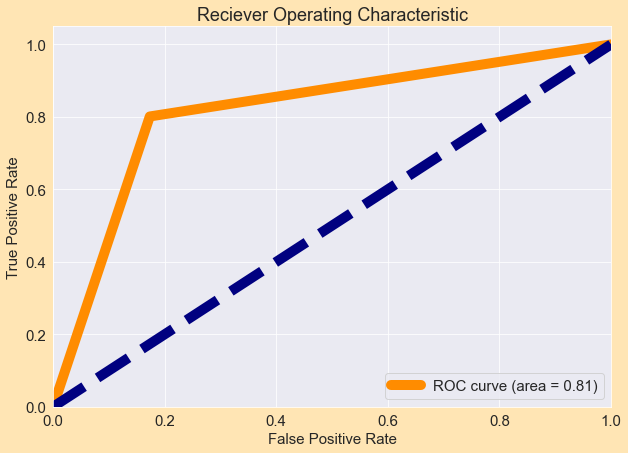

In [247]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color = 'darkorange',lw=10,label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color = 'navy',lw = 10, linestyle = '--')
plt.xlim([0.0,1.0]) # limitation
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic')
plt.legend(loc='lower right') # To display ROC curve (area = 0.81) at the lower right
plt.show()

# we can say that our model is working 81%

## Model Saving

In [248]:
import pickle
filename = 'titanic_pred.pkl'
pickle.dump(lr,open(filename, 'wb'))

In [249]:
import numpy as np
a = np.array(y_test)
predicted = np.array(lr.predict(x_test))
df_com = pd.DataFrame({'Original':a,'Predicted':predicted},index = range(len(a)))
df_com

# comparison of predicted and original value

,Original,Predicted
0,1,0
1,1,1
2,0,0
3,1,0
4,0,1
...,...,...
321,1,1
322,1,1
323,1,1
324,0,0
